In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

### 1. Dataset

In [ ]:
dataset = pd.read_csv("mouse_viral_study.csv")
dataset

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [ ]:
X = dataset[['Med_1_mL', 'Med_2_mL']].values
y = dataset[['Virus Present']].values

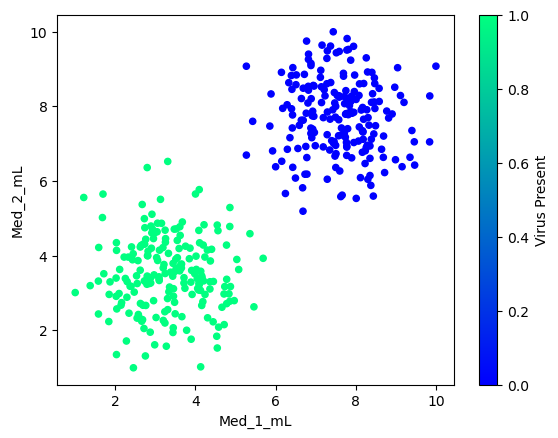

In [ ]:
dataset.plot.scatter(x='Med_1_mL',y='Med_2_mL', c='Virus Present', colormap='winter')
plt.show()

## Test and split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### 2. Modèle


In [ ]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [ ]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

W,b=initialisation(X)
modele(X, W, b)

### 3. Fonction Coût

In [ ]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient

In [ ]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [ ]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction

In [ ]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

### 5. Modèle final

In [ ]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

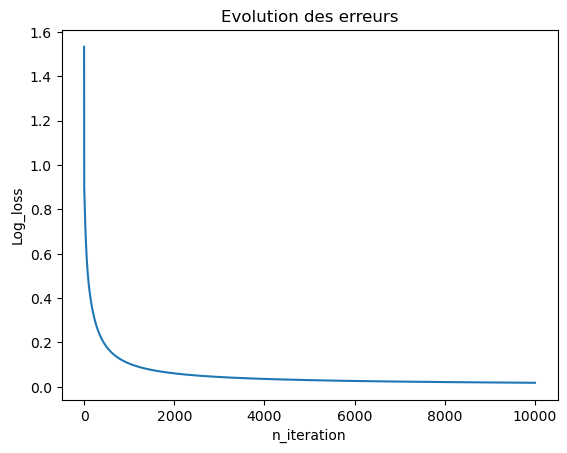

In [ ]:
W,b=regression_logistique(X_train, y_train)

### 5. 1 Evaluation du modèle et Visualisation


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = predict(X_test, W, b)
print("Accuracy=",accuracy_score(y_test, y_pred))

[[8.55899277e-03]
 [9.94444296e-01]
 [6.03031022e-03]
 [4.54634749e-04]
 [9.73243228e-01]
 [4.64159982e-04]
 [1.62369498e-02]
 [9.87569451e-01]
 [9.88741496e-01]
 [2.00112509e-03]
 [9.84560307e-01]
 [9.88830881e-01]
 [2.33717834e-03]
 [2.14082276e-03]
 [9.95154698e-01]
 [9.50602159e-01]
 [9.47093441e-01]
 [3.46436351e-03]
 [8.87040077e-01]
 [6.02327447e-03]
 [9.98005352e-01]
 [6.76843150e-04]
 [9.23934689e-04]
 [1.38057568e-02]
 [5.99425994e-03]
 [7.30009937e-04]
 [2.51349520e-04]
 [9.98562244e-01]
 [1.24187772e-02]
 [4.08042441e-03]
 [9.97211928e-01]
 [6.98852317e-01]
 [9.97283192e-01]
 [1.17673485e-03]
 [4.41018533e-03]
 [2.02558127e-03]
 [8.04673595e-01]
 [9.91681229e-01]
 [1.76613177e-02]
 [9.72440258e-03]
 [9.82841120e-01]
 [1.53430788e-03]
 [9.94097010e-01]
 [5.12717166e-03]
 [7.91485503e-04]
 [9.92797775e-01]
 [1.89223397e-02]
 [9.99348335e-01]
 [1.96898760e-04]
 [5.66529236e-04]
 [9.87970510e-01]
 [9.60214173e-01]
 [1.19554311e-03]
 [9.96788080e-01]
 [7.90915400e-03]
 [9.960238

[0.99999838]
[ True]
[0.99999558]
[ True]
[0.99998904]
[ True]


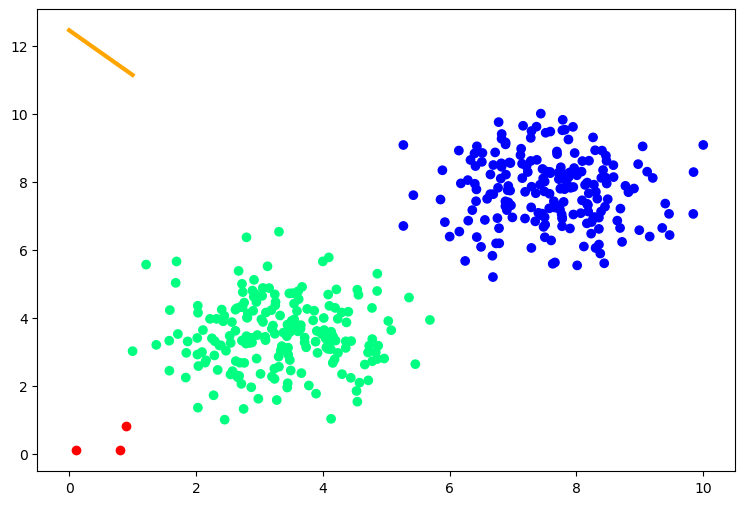

In [ ]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 1, 200)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)

# Prédire la classe de nouveaux éléments

new_1=np.array([0.1,0.1])
new_2=np.array([0.8,0.1])
new_3=np.array([0.9,0.8])
ax.scatter(new_1[0], new_1[1], c='r')
ax.scatter(new_2[0], new_2[1], c='r')
ax.scatter(new_3[0], new_3[1], c='r')
print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

plt.show()

In [ ]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X_test, W, b)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8.55899277e-03]
 [9.94444296e-01]
 [6.03031022e-03]
 [4.54634749e-04]
 [9.73243228e-01]
 [4.64159982e-04]
 [1.62369498e-02]
 [9.87569451e-01]
 [9.88741496e-01]
 [2.00112509e-03]
 [9.84560307e-01]
 [9.88830881e-01]
 [2.33717834e-03]
 [2.14082276e-03]
 [9.95154698e-01]
 [9.50602159e-01]
 [9.47093441e-01]
 [3.46436351e-03]
 [8.87040077e-01]
 [6.02327447e-03]
 [9.98005352e-01]
 [6.76843150e-04]
 [9.23934689e-04]
 [1.38057568e-02]
 [5.99425994e-03]
 [7.30009937e-04]
 [2.51349520e-04]
 [9.98562244e-01]
 [1.24187772e-02]
 [4.08042441e-03]
 [9.97211928e-01]
 [6.98852317e-01]
 [9.97283192e-01]
 [1.17673485e-03]
 [4.41018533e-03]
 [2.02558127e-03]
 [8.04673595e-01]
 [9.91681229e-01]
 [1.76613177e-02]
 [9.72440258e-03]
 [9.82841120e-01]
 [1.53430788e-03]
 [9.94097010e-01]
 [5.12717166e-03]
 [7.91485503e-04]
 [9.92797775e-01]
 [1.89223397e-02]
 [9.99348335e-01]
 [1.96898760e-04]
 [5.66529236e-04]
 [9.87970510e-01]
 [9.60214173e-01]
 [1.19554311e-03]
 [9.96788080e-01]
 [7.90915400e-03]
 [9.960238

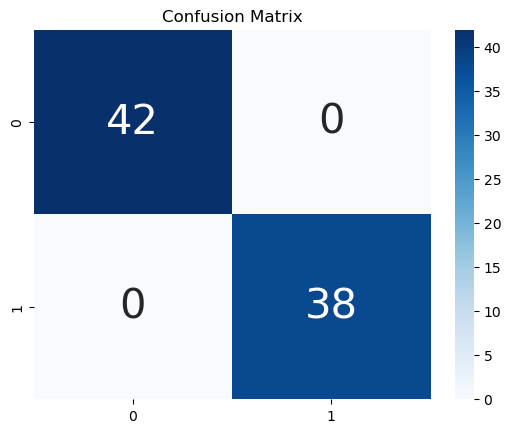

In [ ]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()